# Sommaire

* [Contexte du Projet](#Contexte-du-Projet)
    * [Description des Données](#Description-des-Données)
* [Analyse des données](#Analyse-des-données)  
    * [Import des librairies](#Import-des-librairies)
    * [Importation du Dataset](#Importation-du-Dataset)
    * [Conclusion sur la forme du Dataset](#Conclusion-sur-la-forme-du-dataset)
* [Nettoyage des données](#Nettoyage-des-données)
    * [Encodage de la variable](#Encodage-de-la-variable-de-type-objet)

# Contexte du Projet

Vous êtes développeur AI dans une startup de la Silicon Valley qui fournit des services dans le domaine de l'investissement immobilier a été . Les chargés de relation client ont mentionné que la demande a augmenté récemment et qu'il devient difficile de faire des estimations personnalisées. De ce fait, l'entreprise vous a confier d'automatiser cette tâche avec un modèle prédictif.

Pour cela, vous avez récupéré une base de données qui contient les prix médians des logements pour les districts de Californie issus du recensement de 1990 :

# Description des Données

1) longitude  

2) latitude  

3) housingMedianAge: Âge médian d'une maison dans un pâté de maisons ; un chiffre plus bas correspond à un bâtiment plus récent.  

4) totalRooms: Nombre total de chambres dans un bloc  

5) totalBedrooms: Nombre total de chambres dans un bloc  

4) population: Nombre total de personnes résidant dans un bloc  

5) households: Nombre total de ménages, c'est-à-dire un groupe de personnes résidant dans une unité d'habitation, pour un bloc  

6) medianIncome: Revenu médian des ménages dans un bloc de maisons (mesuré en dizaines de milliers de dollars US)  

7) medianHouseValue: Valeur médiane des maisons pour les ménages d'un bloc (mesurée en dollars US)  

8) oceanProximity: Situation de la maison par rapport à la mer

# Analyse des données

# Import des librairies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
from sklearn.impute import MissingIndicator 
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor

# Importation du Dataset

Première apperçu du Dataset

In [2]:
df = pd.read_csv('silicon_valley_real.txt' , delimiter = ",")
df.head()

,Unnamed: 0,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,2072,-119.84,36.77,6.0,1853.0,473.0,1397.0,417.0,1.4817,72000.0,INLAND
1,10600,-117.80,33.68,8.0,2032.0,349.0,862.0,340.0,6.9133,274100.0,<1H OCEAN
2,2494,-120.19,36.60,25.0,875.0,214.0,931.0,214.0,1.5536,58300.0,INLAND
3,4284,-118.32,34.10,31.0,622.0,229.0,597.0,227.0,1.5284,200000.0,<1H OCEAN
4,16541,-121.23,37.79,21.0,1922.0,373.0,1130.0,372.0,4.0815,117900.0,INLAND


# Exploration des données

In [3]:
df.shape

(16512, 11)

Regardons la distribution des types de nos données

In [4]:
df.dtypes

Unnamed: 0              int64
longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object

<AxesSubplot:ylabel='None'>

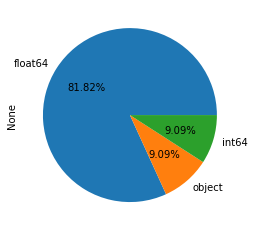

In [5]:
df.dtypes.value_counts().plot.pie(autopct = lambda x: str(round(x, 2)) + '%')

On voit que 1 features 'ocean_proximity' est un objet, 'Unnamed: 0' est un entier et le reste des Floats

<AxesSubplot:>

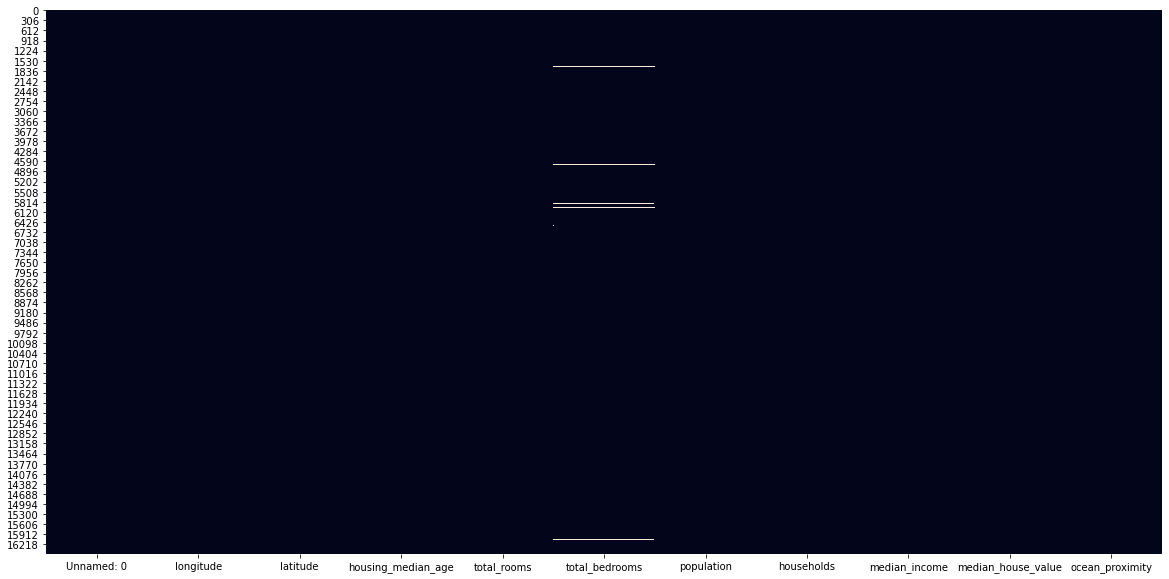

In [6]:
plt.figure(figsize=(20,10))
sns.heatmap(df.isna(), cbar=False)

In [7]:
(df.isna().sum()/df.shape[0]).sort_values(ascending=True)

Unnamed: 0            0.000000
longitude             0.000000
latitude              0.000000
housing_median_age    0.000000
total_rooms           0.000000
population            0.000000
households            0.000000
median_income         0.000000
median_house_value    0.000000
ocean_proximity       0.000000
total_bedrooms        0.010659
dtype: float64

Il apparait que notre Dataset possède des valeurs manquantes dans la colonne "total_bedrooms" environ 1%  
Nous pouvons donc supprimer ces lignes dont les valeurs manques.

In [8]:
df.describe()

,Unnamed: 0,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16336.000000,16512.000000,16512.000000,16512.000000,16512.000000
mean,10295.498789,-119.564046,35.626523,28.624516,2644.170603,539.319540,1435.017260,501.135962,3.864091,206509.251453
std,5941.973488,2.005033,2.139150,12.597980,2213.946369,425.207704,1158.151967,385.650673,1.893244,115225.957661
min,0.000000,-124.350000,32.540000,1.000000,6.000000,2.000000,3.000000,2.000000,0.499900,14999.000000
25%,5178.750000,-121.790000,33.930000,18.000000,1446.000000,296.000000,788.000000,280.000000,2.562500,119400.000000
50%,10263.500000,-118.490000,34.250000,29.000000,2116.000000,435.000000,1168.000000,410.000000,3.531300,179300.000000
75%,15438.250000,-118.010000,37.710000,37.000000,3154.000000,647.000000,1738.000000,606.000000,4.733225,264500.000000
max,20639.000000,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


Grâce à ce describe, on remarque de possible outlier pour 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population' et 'households' car leurs valeurd dmax sont très éloigné du 3e quartile.

In [9]:
df.duplicated().sum()

0

Aucune donnée n'est dupliquée

# Détection des Outliers

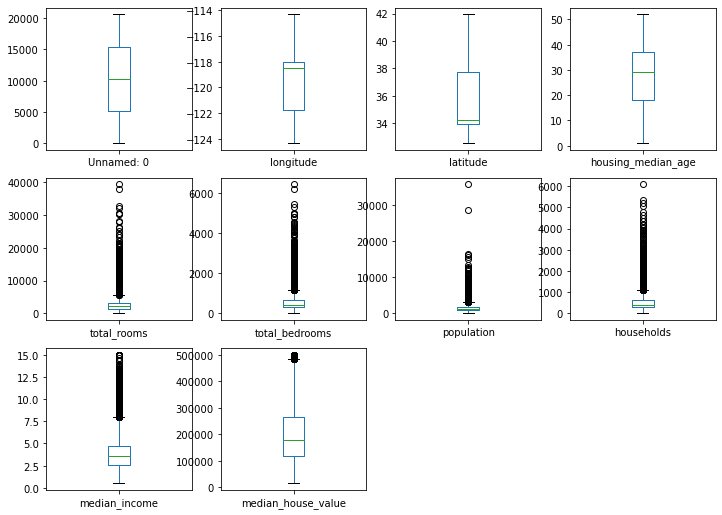

In [10]:
df.plot(kind='box', subplots=True, layout=(4, 4), figsize = (12, 12));

On remarque des outliers pour certains features. Mais il n'est pas abérant d'avoir de forte population à certain endroit avec de gros revenu  ou des batiments très chere avec beaucoup de pièce et beaucoup de chambre. 

# Conclusion sur la forme du dataset

variable target : median_house_value  
lignes et colonnes : 16512, 11  
types de variables : 81% float, 9% object, 9% Float  
Analyse des valeurs manquantes : Peu de valeur manquante 1% sur total_bedrooms  
  
Nous devrons donc enlever les valeurs manquantes car celle ci sont dérisoires comparé à la taille du Dataset  
Il faudra encoder le feature 'ocean_proximity' ce dernier étant de type qualitative  
Un risque d'outlier important sur certaine variable. Cela étant, il s'agit de valeur propre à un dataset immobilier.  
Il n'est pas abérant qu'un habitation possède beaucoup de pièce/chambre ou qu'un prix d'une habitation soit énorme.  
Nous devrons surement garder ces outliers.


# Nettoyage des données

Nous allons supprimer les valeurs manquantes 

In [11]:
df = df.dropna()

In [12]:
df.isnull().sum()

Unnamed: 0            0
longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

On supprime la colonne inutile qui pourrait fausser notre future modèle

In [13]:
df = df.drop(['Unnamed: 0'], axis=1)

# Encodage de la variable de type objet

On utilise la fonction get_dummies pour encoder la variable "ocean_proximity"

In [14]:
df = pd.get_dummies(df, columns=["ocean_proximity"], prefix=["encoding"])

In [15]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,encoding_<1H OCEAN,encoding_INLAND,encoding_ISLAND,encoding_NEAR BAY,encoding_NEAR OCEAN
0,-119.84,36.77,6.0,1853.0,473.0,1397.0,417.0,1.4817,72000.0,0,1,0,0,0
1,-117.80,33.68,8.0,2032.0,349.0,862.0,340.0,6.9133,274100.0,1,0,0,0,0
2,-120.19,36.60,25.0,875.0,214.0,931.0,214.0,1.5536,58300.0,0,1,0,0,0
3,-118.32,34.10,31.0,622.0,229.0,597.0,227.0,1.5284,200000.0,1,0,0,0,0
4,-121.23,37.79,21.0,1922.0,373.0,1130.0,372.0,4.0815,117900.0,0,1,0,0,0
